# Лосев Владислав ФН12-31м



# Готовим библиотеки и скачиваем данные для обучения

In [1]:
!wget -O reviews.tskv https://github.com/yandex/geo-reviews-dataset-2023/raw/refs/heads/master/geo-reviews-dataset-2023.tskv?download=

--2024-12-15 12:54:11--  https://github.com/yandex/geo-reviews-dataset-2023/raw/refs/heads/master/geo-reviews-dataset-2023.tskv?download=
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/yandex/geo-reviews-dataset-2023/refs/heads/master/geo-reviews-dataset-2023.tskv?download=true [following]
--2024-12-15 12:54:11--  https://media.githubusercontent.com/media/yandex/geo-reviews-dataset-2023/refs/heads/master/geo-reviews-dataset-2023.tskv?download=true
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 378730064 (361M) [application/octet-stream]
Saving to: ‘reviews.tskv’

reviews.tskv  

In [20]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 2.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4296188 sha256=2524014736166a7a2f379f4daa1af3259da8245506790b789d7c0b4a38163b9b
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext


In [21]:
data = []
with open("reviews.tskv") as f:
    for line in f:
        item_to_save = {}
        for key_val in line.split("\t"):
            key, val = key_val.split("=", 1)
            item_to_save[key] = val
        data.append(item_to_save)


In [22]:
import pandas as pd

In [23]:
data = pd.DataFrame.from_dict(data)
data["rating"] = data["rating"].astype(float)

In [24]:
data.head()

,address,name_ru,rating,rubrics,text
0,"Екатеринбург, ул. Московская / ул. Волгоградск...",Московский квартал,3.0,Жилой комплекс,Московский квартал 2.\nШумно : летом по ночам ...
1,"Московская область, Электросталь, проспект Лен...",Продукты Ермолино,5.0,Магазин продуктов;Продукты глубокой заморозки;...,"Замечательная сеть магазинов в общем, хороший ..."
2,"Краснодар, Прикубанский внутригородской округ,...",LimeFit,1.0,Фитнес-клуб,"Не знаю смутят ли кого-то данные правила, но я..."
3,"Санкт-Петербург, проспект Энгельса, 111, корп. 1",Snow-Express,4.0,Пункт проката;Прокат велосипедов;Сапсёрфинг,Хорошие условия аренды. \nДружелюбный персонал...
4,"Тверь, Волоколамский проспект, 39",Студия Beauty Brow,5.0,"Салон красоты;Визажисты, стилисты;Салон бровей...",Топ мастер Ангелина топ во всех смыслах ) Немн...


In [25]:
data["rating"].value_counts()

,count
rating,
5.0,390515
4.0,41160
1.0,34351
3.0,21686
2.0,12088
0.0,200


In [26]:

data_test_to_eval = pd.read_csv("data_test_to_evaluate.tsv", sep="\t")


In [27]:
data = data.loc[data["rating"]!=0., :]

In [28]:
data.shape

(499800, 5)

Удалим дубликаты и посмотрим на основную информацию

In [29]:
def data_info(data):
    print('Первые 5 строк в датафрейме:')
    display(data.head())
    print('------------------------------------------------------------------------------------')
    print('Основная информация df.info():')
    data.info()
    print('------------------------------------------------------------------------------------')
    display(pd.DataFrame({'Количество пропущенных значений': data.isna().sum()}))
    print('------------------------------------------------------------------------------------')
    print(f'Количество дубликатов: {data.duplicated().sum()}')
    print('------------------------------------------------------------------------------------')

In [30]:
data_info(data)

Первые 5 строк в датафрейме:


,address,name_ru,rating,rubrics,text
0,"Екатеринбург, ул. Московская / ул. Волгоградск...",Московский квартал,3.0,Жилой комплекс,Московский квартал 2.\nШумно : летом по ночам ...
1,"Московская область, Электросталь, проспект Лен...",Продукты Ермолино,5.0,Магазин продуктов;Продукты глубокой заморозки;...,"Замечательная сеть магазинов в общем, хороший ..."
2,"Краснодар, Прикубанский внутригородской округ,...",LimeFit,1.0,Фитнес-клуб,"Не знаю смутят ли кого-то данные правила, но я..."
3,"Санкт-Петербург, проспект Энгельса, 111, корп. 1",Snow-Express,4.0,Пункт проката;Прокат велосипедов;Сапсёрфинг,Хорошие условия аренды. \nДружелюбный персонал...
4,"Тверь, Волоколамский проспект, 39",Студия Beauty Brow,5.0,"Салон красоты;Визажисты, стилисты;Салон бровей...",Топ мастер Ангелина топ во всех смыслах ) Немн...


------------------------------------------------------------------------------------
Основная информация df.info():
<class 'pandas.core.frame.DataFrame'>
Index: 499800 entries, 0 to 499999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   address  499800 non-null  object 
 1   name_ru  498830 non-null  object 
 2   rating   499800 non-null  float64
 3   rubrics  499800 non-null  object 
 4   text     499800 non-null  object 
dtypes: float64(1), object(4)
memory usage: 22.9+ MB
------------------------------------------------------------------------------------


,Количество пропущенных значений
address,0
name_ru,970
rating,0
rubrics,0
text,0


------------------------------------------------------------------------------------
Количество дубликатов: 1
------------------------------------------------------------------------------------


In [32]:
data=data.drop_duplicates()

Сбалансируем датасет, проведем downsample отзывов 5*

In [33]:

RATING_COUNT_MAX =50000# 100000
data_small = pd.DataFrame(data.loc[data["rating"] < 5, :])
data_small = pd.concat([data_small,data.loc[data["rating"] == 5, :].iloc[:RATING_COUNT_MAX,:]], ignore_index=True)

In [34]:
data_small["rating"].value_counts()

,count
rating,
5.0,50000
4.0,41160
1.0,34351
3.0,21686
2.0,12088


Удалим слишком длинные и слишком короткие предложения

In [35]:

def text_len(text):

    return len(text.split())
data_small['len']=data_small['text'].apply(text_len)



In [36]:
data_small["rating"].value_counts()

,count
rating,
5.0,50000
4.0,41160
1.0,34351
3.0,21686
2.0,12088


Изучим распределение длины отзывов в датасете

In [37]:
max(data_small['text'],key=text_len)

'Отвратительно 👎👎Аквалоо 3* \\n4,0\\nСанаторийАквалоо 3* \\n4,0\\nСанаторий\\n  \\n  \\n4 / 5\\n11 452 оценки · 4 785 отзывов\\n\\nDonara G.\\nОпубликовано для всех\\n\\n  31 янв 2023\\nОтвратительно 👎👎\\nОтзывы\\n\\nСначала негативные\\n\\nАнна Жнакина\\nЗнаток города 4 уровня\\n  20 авг 2022\\n... каждый день, но полотенца не меняют, в номере полы моют плохо, нехватка обслуживающего персонала, в день заселения одна девушка убирала целых 2 этажа, не успевала, бедная как загнанная лошадь, даже и претензии... Читать целикомПолотенец не хватает, горки в аквапарке не всегда всё работают, еда хорошая, всегда можно что-то выбрать и наесться, пляж близко, хороший, в санузле убирают каждый день, но полотенца не меняют, в номере полы моют плохо, нехватка обслуживающего персонала, в день заселения одна девушка убирала целых 2 этажа, не успевала, бедная как загнанная лошадь, даже и претензии ей было предъявлять неудобно, отель явно не заботится о своих работниках, что уж говорить о клиентах, меб

In [38]:
max(data_small['len'])

2918

In [39]:
import numpy as np

In [40]:
np.mean(data_small['len'])

57.238572370279684

In [41]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Количество')

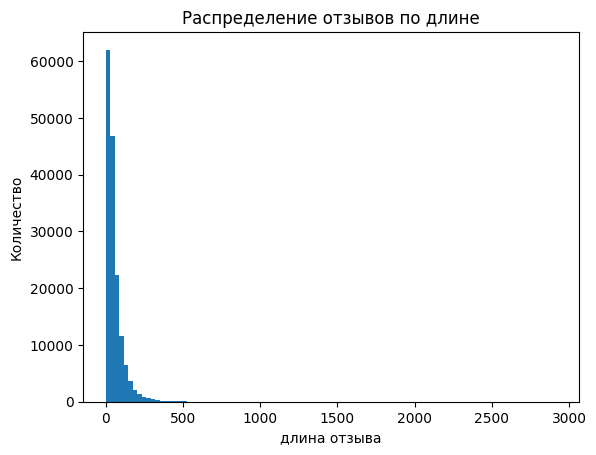

In [42]:
plt.hist(data_small['len'],bins=100);
plt.title('Распределение отзывов по длине')
plt.xlabel('длина отзыва')
plt.ylabel('Количество')

Text(0, 0.5, 'длина отзыва')

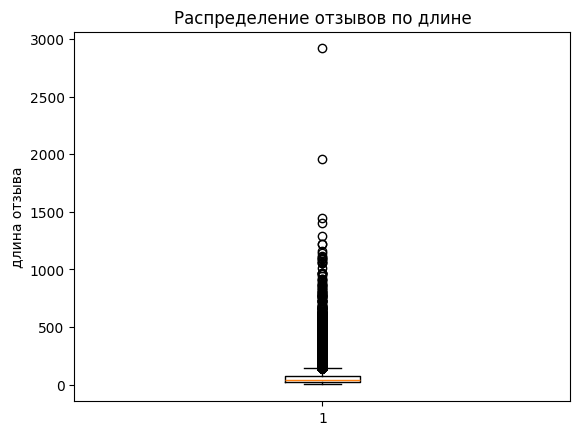

In [43]:
plt.boxplot(data_small['len']);
plt.title('Распределение отзывов по длине')
plt.ylabel('длина отзыва')

Удалим слишком длинные/короткие отзывы

In [44]:
data_small=data_small.query('len<200')
data_small=data_small.query('len>3')

In [45]:
data_small.shape

(154214, 6)

Подгрузим эмбеддинги предобученного fasttext для русского языка

In [46]:
import fasttext
import fasttext.util
import numpy as np

# Download the pre-trained model for a specific language if necessary
# fasttext.util.download_model('en', if_necessary=True)  # English

# Load a pre-trained model (change 'cc.en.300.bin' to your downloaded model file)
#fasttext.util.download_model('ru', if_exists='ignore')


In [47]:

!wget -O cc.ru.300.bin.gz https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ru.300.bin.gz

--2024-12-15 14:09:35--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ru.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.164.78.72, 18.164.78.81, 18.164.78.121, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.164.78.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4496459151 (4.2G) [application/octet-stream]
Saving to: ‘cc.ru.300.bin.gz’

cc.ru.300.bin.gz    100%[===================>]   4.19G   172MB/s    in 48s     

2024-12-15 14:10:23 (88.9 MB/s) - ‘cc.ru.300.bin.gz’ saved [4496459151/4496459151]



In [48]:
!gzip -d cc.ru.300.bin.gz

In [49]:
model = fasttext.load_model('cc.ru.300.bin')  # make sure the file path is correct

In [50]:
import nltk

In [51]:
from nltk.tokenize import word_tokenize

Создадим множество из стоп-слов для русского языка, убрав из него слова, влияющие на контекст при анализе отзывов, например: лучше, больше, хорошо. То есть использующиеся для сравнение или имеющий явный сентиментальный окрас

In [52]:
from nltk.corpus import stopwords
nltk.download('stopwords')
russian_stopwords = set(stopwords.words('russian'))
russian_stopwords=russian_stopwords-{'лучше','нет','более','не','был', 'конечно','больше','хорошо','много','три','один','никогда','сейчас', 'почти', 'может', 'всегда','нельзя','совсем','опять'}
russian_stopwords=russian_stopwords.union({'это','то','был','ещё','нам','всем','туда','что'})

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [53]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

Удалим стоп-слова и лишние символы из данных

In [54]:
import re

In [55]:
nltk.download('punkt_tab')
def remove_stopwords(text):

    words = word_tokenize(text.lower())

    filtered_words = [
        word.lower() for word in words
        if  word not in russian_stopwords]

    sentence=    ' '.join(filtered_words)
    sentence = sentence.replace("\n", " ").replace("\\n", " ")
    sentence=sentence.strip()
    pattern = r'[^ЁёА-яA-Za-z0-9 ]'
    sentence= re.sub(pattern, " ", sentence)
    sentence = sentence.replace("  ", " ")
    sentence=sentence.strip()
    sentence = sentence.lower()

    return sentence

data_small['text']= data_small['text'].apply(remove_stopwords)
data_test_to_eval["review_text"]=data_test_to_eval["review_text"].apply(remove_stopwords)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Обучим fasttext на сбалансированных данных из датасета

In [ ]:
with open('train_data5.txt', 'w', encoding='utf-8') as f:
    for line in data_small['text']:
        f.write(line + '\n')

In [ ]:
model = fasttext.train_unsupervised('train_data5.txt',
                                   model='skipgram',
                                   dim=100,
                                   epoch=9,
                                   lr=0.04,
                                   minCount=1,
                                   wordNgrams=2,
                                   ws=6,
                                   loss='hs')

Посчитаем самые часто употребляемые слова, некоторые из них добавим в список стоп-слов

In [57]:
from collections import Counter

In [58]:
words = Counter()

In [59]:
for sentence in data_test_to_eval["review_text"]:

    for word in word_tokenize(sentence.lower()):
        words[word] += 1

In [60]:
words.most_common(150)

[('не', 8336),
 ('очень', 2753),
 ('нет', 1011),
 ('место', 949),
 ('просто', 761),
 ('персонал', 754),
 ('много', 669),
 ('то', 648),
 ('время', 564),
 ('всё', 564),
 ('всегда', 509),
 ('больше', 500),
 ('2', 459),
 ('цены', 438),
 ('минут', 435),
 ('еда', 408),
 ('магазин', 402),
 ('5', 388),
 ('спасибо', 384),
 ('вообще', 380),
 ('день', 375),
 ('хотя', 369),
 ('рекомендую', 366),
 ('один', 360),
 ('заказ', 359),
 ('3', 350),
 ('хороший', 346),
 ('нужно', 342),
 ('кофе', 339),
 ('кафе', 336),
 ('10', 335),
 ('1', 327),
 ('очереди', 319),
 ('работает', 319),
 ('понравилось', 312),
 ('обслуживание', 305),
 ('сюда', 301),
 ('которые', 293),
 ('меню', 290),
 ('заведение', 289),
 ('большой', 283),
 ('может', 281),
 ('который', 280),
 ('рядом', 279),
 ('хорошо', 279),
 ('стоит', 276),
 ('лучше', 273),
 ('вкусно', 268),
 ('быстро', 267),
 ('метро', 259),
 ('выбор', 258),
 ('людей', 257),
 ('интерьер', 253),
 ('деньги', 252),
 ('почему', 248),
 ('4', 246),
 ('целом', 245),
 ('сразу', 242),


In [61]:
data_test_to_eval["review_text"].head(7)

,review_text
0,сложно попасть многие спрашивают не знаете пр...
1,почта россии недавних пор стала продвинутой ци...
2,живу рядом соседнем доме стены дрожат буквал...
3,привет никогда жизни не писал никакие отзывы ...
4,бизнес ланч не понравился не смотря большой в...
5,дизайн атмосфера прикольные музыки почти не с...
6,здорово много гуляющих большая территория с...


Напишем функцию для получения эмбеддингов предложения. В данном случае будем использовать average pooling. Предварительно приведем текст к нижнему регистру, удалим лишние символы, знаки препинания, пробелы

In [62]:
import re
def compute_word_embedding(word):
    return model.get_word_vector(word)

def compute_sentence_embedding(sentence):


    sentence = sentence.replace("\n", " ").replace("\\n", " ")
    sentence=sentence.strip()
    pattern = r'[^ЁёА-яA-Za-z ]'
    sentence= re.sub(pattern, " ", sentence)
    sentence = sentence.replace("  ", " ")
    sentence=sentence.strip()
    sentence = sentence.lower()


    words = word_tokenize(sentence)


    #word_embeddings = [compute_word_embedding(word)  if word not in russian_stopwords and word not in string.punctuation else list(np.zeros(len(compute_word_embedding('да')))) for word in words]
    word_embeddings = [compute_word_embedding(word) for word in words]
    word_embeddings_mean = np.mean(word_embeddings, axis=0)#
    ##sentence_embedding = word_embeddings_mean
    sentence_embedding = word_embeddings_mean / max(0.0001, np.linalg.norm(word_embeddings_mean))#
   # word_embeddings_max=np.max(word_embeddings, axis=0)
    return sentence_embedding #word_embeddings_max / max(0.0001, np.linalg.norm(word_embeddings_max))#sentence_embedding#

Лемматизация не помогла

In [ ]:
pip install pymorphy3

In [ ]:
from pymorphy3 import MorphAnalyzer


morph = MorphAnalyzer()

In [ ]:
def lemmatize_text(text):

    words = text.split()

    lemmatized_words = [morph.parse(word)[0].normal_form for word in words]

    return ' '.join(lemmatized_words)

In [ ]:
#data_test_to_eval["review_text"]=data_test_to_eval["review_text"].apply(lemmatize_text)#6000 строк, 40 сек

In [ ]:
#data_small['text'] = data_small['text'].apply(lemmatize_text)

In [63]:
X = []
y = []


In [64]:
import tqdm.notebook as tqdm

In [65]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [66]:

for line in tqdm.tqdm(zip(data_small["text"].values, data_small["rating"].values), total=data_small.shape[0]):
    X.append(compute_sentence_embedding(line[0]))
    y.append(line[1])

  0%|          | 0/154214 [00:00<?, ?it/s]

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle=True)#test_size = 0.2,

In [68]:
from sklearn.metrics import root_mean_squared_error

In [69]:

X_pred = []

for line in tqdm.tqdm(data_test_to_eval["review_text"]):
    X_pred.append(compute_sentence_embedding(line))#X_pred.append(compute_sentence_embedding(line[0]))

  0%|          | 0/6211 [00:00<?, ?it/s]

catboost

In [70]:
!pip install catboost
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.3 MB/s eta 0:00:00


In [71]:
from catboost import CatBoostRegressor

In [72]:
cb = CatBoostRegressor(iterations=3500,depth=7,learning_rate=0.035,l2_leaf_reg=4)

In [73]:
from catboost import Pool
eval_pool = Pool(X_test, y_test)

In [74]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
#del cb

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
distributions = {'max_depth': np.arange(9,13),'l2_leaf_reg':[0.5,1,3,4],'learning_rate':[0.03,0.04,0.05]}

catboost_cv = RandomizedSearchCV(CatBoostRegressor(
                                iterations=100
                                ), distributions,cv=5,
                                 n_jobs=-1)

#catboost_cv.fit(X_origin, ytrain)

In [ ]:
cb.fit(X_train, y_train, eval_set=eval_pool, use_best_model=True, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.4737877	test: 1.4760546	best: 1.4760546 (0)	total: 273ms	remaining: 15m 55s
1:	learn: 1.4528155	test: 1.4552723	best: 1.4552723 (1)	total: 502ms	remaining: 14m 37s
2:	learn: 1.4323996	test: 1.4350429	best: 1.4350429 (2)	total: 731ms	remaining: 14m 12s
3:	learn: 1.4132425	test: 1.4162057	best: 1.4162057 (3)	total: 958ms	remaining: 13m 56s
4:	learn: 1.3947437	test: 1.3978643	best: 1.3978643 (4)	total: 1.19s	remaining: 13m 50s
5:	learn: 1.3769841	test: 1.3800765	best: 1.3800765 (5)	total: 1.43s	remaining: 13m 55s
6:	learn: 1.3601014	test: 1.3631695	best: 1.3631695 (6)	total: 1.69s	remaining: 14m 2s
7:	learn: 1.3440582	test: 1.3473084	best: 1.3473084 (7)	total: 1.93s	remaining: 14m 2s
8:	learn: 1.3286963	test: 1.3320538	best: 1.3320538 (8)	total: 2.21s	remaining: 14m 18s
9:	learn: 1.3138291	test: 1.3171223	best: 1.3171223 (9)	total: 2.49s	remaining: 14m 27s
10:	learn: 1.3000285	test: 1.3033816	best: 1.3033816 (10)	total: 2.76s	remaining: 14m 36s
11:	learn: 1.2867034	test: 1.290

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

Support for third party widgets will remain active for the duration of the session. To disable support:

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

In [ ]:
y_pred = cb.predict(X_pred)#X_pred

In [ ]:
y_pred[:100]

array([2.14372443, 4.21973256, 2.01639259, 1.4894295 , 4.55613264,
       2.88543942, 4.48899895, 1.43915561, 1.4876692 , 3.76258887,
       3.33095629, 4.89190965, 1.43338324, 4.62388057, 4.63413915,
       5.11447037, 1.67869424, 4.87680975, 2.38578663, 4.7086302 ,
       1.00457917, 3.82500609, 3.63273863, 3.09313118, 3.54226766,
       4.87737313, 4.33219096, 0.85712917, 4.09701548, 2.8292743 ,
       1.08246536, 1.62201588, 2.32815507, 3.6252985 , 1.12466728,
       3.21950911, 1.37686265, 1.69520933, 3.99730929, 1.68914664,
       4.10484698, 5.20330841, 1.44483591, 4.62300531, 3.57205358,
       1.06269314, 0.23553691, 3.32245854, 1.37783916, 2.26000031,
       1.32565127, 4.48378163, 2.5163588 , 1.38874245, 4.00392545,
       2.03242424, 2.20829881, 4.34643783, 3.29416939, 3.58075743,
       3.64020021, 5.14957344, 4.70870424, 1.4978168 , 3.42954948,
       2.96279136, 2.68317144, 1.70325321, 3.40075407, 3.69263331,
       2.89404407, 1.98934477, 2.35431371, 3.33564993, 3.14606

In [ ]:
y_pred=list(y_pred)

In [ ]:
len(X_pred)

6211

In [ ]:

y_pred = [5.0 if x > 5.0 else x for x in y_pred]
y_pred = [1.0 if x < 1.0 else x for x in y_pred]

In [ ]:
pd.DataFrame(y_pred).to_csv("cb_submit53.tsv", sep="\t", header=None)

In [ ]:
pip install lightgbm

Попробуем бустинг с помощью lightgbm

In [ ]:
import lightgbm as lgb

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
model = lgb.LGBMRegressor(
    objective='regression',

    learning_rate=0.04,
    n_estimators=100
)


model.fit( X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.667302 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 76500
[LightGBM] [Info] Number of data points in the train set: 134425, number of used features: 300
[LightGBM] [Info] Start training from score 3.762581


LGBMRegressor(learning_rate=0.04, n_estimators=10, objective='regression')

In [ ]:
y_pred = model.predict(X_test, num_iteration=model.best_iteration_)

# Оценка модели
rmse = root_mean_squared_error(y_test, y_pred)


print(f"(RMSE): {rmse:.4f}")

Среднеквадратичная ошибка (MSE): 1.2867


Попробуем решить задачу с помощью нейронной сети

In [ ]:
import torch

In [ ]:
from torch.utils.data import Dataset, DataLoader

In [ ]:
class MyDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

In [ ]:
dataset_train = MyDataset(X_train, y_train)
dataset_test = MyDataset(X_test, y_test)

<ipython-input-58-6c387ff14135>:3: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  self.features = torch.tensor(features, dtype=torch.float32)


In [ ]:
batch_size = 64
dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
dataloader_test = DataLoader(dataset_test, batch_size=batch_size)

In [ ]:
import torch.nn as nn

In [ ]:
import torch

In [ ]:
class Net(nn.Module):
    def __init__(self,inp,init_type='xavier'):
        super(Net,self).__init__()

        self.fc1 = nn.Linear(inp, 100)
        self.act1 = nn.ReLU()
        self.fc2 = nn.Linear(100, 50)
        self.act2 = nn.ReLU()
        self.fc3 = nn.Linear(50, 1)

        if init_type=='xavier':
            torch.nn.init.xavier_normal_(self.fc1.weight)
            torch.nn.init.xavier_normal_(self.fc2.weight)

        elif init_type=='he':
            torch.nn.init.kaiming_normal_(self.fc1.weight)
            torch.nn.init.kaiming_normal_(self.fc2.weight)
        elif  init_type=='zeros':
            torch.nn.init.zeros_(self.fc1.weight)
            torch.nn.init.zeros_(self.fc2.weight)
        else:
            torch.nn.init.xavier_normal_(self.fc1.weight)
            torch.nn.init.xavier_normal_(self.fc2.weight)

        #хуже всего nn.init.zeros_

    def forward(self, x):

        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)


        return x

In [ ]:
import tqdm
from tqdm.auto import tqdm

In [ ]:
def train_batch(model, loader, criterion, optimizer, num_epoch):


    for t in tqdm(range(num_epoch)):
        epoch_loss = []

        # цикл по батчам
        for X_batch, y_batch in loader:
            X_batch = X_batch
            y_batch = y_batch.float()

            y_pred = model(X_batch)

            loss = criterion(y_pred, y_batch)
            epoch_loss.append(loss.item())


            loss.backward()

            optimizer.step()

            optimizer.zero_grad()

        print('batch: ',t," curr_loss:", np.mean(epoch_loss))

    return model

In [ ]:
netmodel = Net(300)


criterion = torch.nn.MSELoss()

optimizer = torch.optim.Adam(netmodel.parameters(), lr=0.01)

In [ ]:
y_train=torch.from_numpy(np.array(y_train))
y_train=y_train.long()
y_train=y_train.to(torch.long)

In [ ]:
y_test=torch.from_numpy(np.array(y_test))
y_test=y_test.long()

In [ ]:
X_test=torch.from_numpy(np.array(X_test))
X_test=X_test.to(torch.float32)

In [ ]:

X_train=torch.from_numpy(np.array(X_train))
X_train=X_train.to(torch.float32)


In [ ]:
y_train=y_train.to(torch.float32)

In [ ]:
y_test=y_test.to(torch.float32)

In [ ]:
model3 = train_batch(netmodel, dataloader_train, criterion, optimizer, 100)

  0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([5])) that is different to the input size (torch.Size([5, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


batch:  0  curr_loss: 2.2600493394582113
batch:  1  curr_loss: 2.186705871415874
batch:  2  curr_loss: 2.184844381850341
batch:  3  curr_loss: 2.183850416173303
batch:  4  curr_loss: 2.1841699612443546
batch:  5  curr_loss: 2.1843849375654694
batch:  6  curr_loss: 2.1822795330829066
batch:  7  curr_loss: 2.181254055127907
batch:  8  curr_loss: 2.1814492567697585
batch:  9  curr_loss: 2.1803000828694086
batch:  10  curr_loss: 2.1824163710681583
batch:  11  curr_loss: 2.1807457191866235
batch:  12  curr_loss: 2.178903266841617
batch:  13  curr_loss: 2.1796218007532526
batch:  14  curr_loss: 2.1781217638680377
batch:  15  curr_loss: 2.1780095804083803
batch:  16  curr_loss: 2.1779916151249257
batch:  17  curr_loss: 2.1776313264659874
batch:  18  curr_loss: 2.1792212682497265
batch:  19  curr_loss: 2.1774500007529873
batch:  20  curr_loss: 2.177537673235805
batch:  21  curr_loss: 2.1767951389081683
batch:  22  curr_loss: 2.1770642478215065
batch:  23  curr_loss: 2.176387307864568
batch:  2

KeyboardInterrupt: 

In [ ]:
lr_scheduler=torch.optim.lr_scheduler.StepLR(optimizer,step_size=20,gamma=0.9)#потом можно изменить (в LROnPlateau в цикле при шаге нужно передавать  loss или метрику )
netmodel,ls,lts = train(netmodel, X_train, y_train, criterion, optimizer,10,X_test, y_test)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([153629])) that is different to the input size (torch.Size([153629, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [ ]:
with torch.no_grad():
    nn_prediction = netmodel(X_test)

In [ ]:
max_values, _ = torch.max(nn_prediction, dim=1)